In [1]:
#This is a jupyter notebook that lets you run sections of code as view their outputs - run each section using ctrl + Enter
#This notebook imports the libraries necessary to run team and player based Elo ratings, and can be used to generate csv files of the outputs
#Make sure you have the filepaths to the downloaded scripts and raw files correct

# First step is to import the necessary libraries which you should have installed on your system
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import elo_ratings as elo

print("Modules loaded")


Modules loaded


In [ ]:
# Run Team Level Elo Ratings
#Import the file - change the filepath variable to where your innings csv is saved - remember you need two backslashes for subfolders
match_df = elo.import_statsguru_innings(filepath = "example_data\\StatsGuru_IPL2024_Innings.csv")
print(match_df)

In [ ]:
# Set up the dataframe to track the total team Elo rankings
team_elo = elo.create_team_elo(match_df)
print(team_elo)

In [ ]:
# Calculate the Elo ratings, show the final standings, and plot the match-by-match progress of each team
# Remember to re-run the cell above to reset the ratings 

match_df, team_elo, team_elo_tracker = elo.calc_team_elo(match_df, team_elo)

elo.plot_team_elo_tracker(team_elo_tracker)
print(team_elo)

In [ ]:
#Export csv containing match results and elo outcomes
match_df.to_csv("example_outputs//ipl_2024_team_elo.csv")

In [10]:
# Import ball-by-ball csv data, either from cricsheet or PCS and view the top 5 rows

df = elo.import_bbb_csv_file("example_data\\all_ipl_matches.csv")

#Just take games from 2024 to make sample size smaller
df= df.loc[full_df['start_date'] > '2024-01-01'].reset_index()
print(df.head())

Importing file...
Done!
    index  match_id season start_date  \
0  243817   1422119   2024 2024-03-22   
1  243818   1422119   2024 2024-03-22   
2  243819   1422119   2024 2024-03-22   
3  243820   1422119   2024 2024-03-22   
4  243821   1422119   2024 2024-03-22   

                                      venue  innings_number  ball  \
0  MA Chidambaram Stadium, Chepauk, Chennai               1   0.1   
1  MA Chidambaram Stadium, Chepauk, Chennai               1   0.2   
2  MA Chidambaram Stadium, Chepauk, Chennai               1   0.3   
3  MA Chidambaram Stadium, Chepauk, Chennai               1   0.4   
4  MA Chidambaram Stadium, Chepauk, Chennai               1   0.5   

             batting_team_name    bowling_team_name batter_scorecard_name  \
0  Royal Challengers Bengaluru  Chennai Super Kings               V Kohli   
1  Royal Challengers Bengaluru  Chennai Super Kings               V Kohli   
2  Royal Challengers Bengaluru  Chennai Super Kings          F du Plessis   
3  Roy

In [11]:
# Import DLS table, and create batter and bowler Elo dataframes
# There are different dls tables available for each format of T20, ODI and Test

dls_df = elo.load_dls_table(filepath = "dls_tables\\dls_t20.csv", plot= False)

bowler_elo = elo.create_player_elo(df, role = "bowler")
batter_elo = elo.create_player_elo(df, role = "batter")

print(bowler_elo)
print("  ")
print(batter_elo)

                bowler  rating  deliveries
0             A Badoni  1000.0           0
1             A Kamboj  1000.0           0
2             A Mishra  1000.0           0
3             A Nortje  1000.0           0
4           AD Russell  1000.0           0
..                 ...     ...         ...
133  Washington Sundar  1000.0           0
134          YS Chahal  1000.0           0
135         Yash Dayal  1000.0           0
136        Yash Thakur  1000.0           0
137      Yudhvir Singh  1000.0           0

[138 rows x 3 columns]
  
                batter  rating  deliveries
0             A Badoni  1000.0           0
1             A Kamboj  1000.0           0
2            A Manohar  1000.0           0
3             A Nortje  1000.0           0
4        A Raghuvanshi  1000.0           0
..                 ...     ...         ...
166           WG Jacks  1000.0           0
167            WP Saha  1000.0           0
168  Washington Sundar  1000.0           0
169        YBK Jaiswal  100

In [12]:
# Run the Elo calculations for the ball-by-ball data set, and create a tracking dataframe for each batter and bowler
# This may take a some time depending on the size of the dataset and the power of your computer
# Again, remember to re-run the cell abive to reset the ratings 

df, bowler_elo, bowler_elo_tracker, batter_elo, batter_elo_tracker = elo.calc_player_elo(df, dls_df, bowler_elo, batter_elo, par_score = 180)
df.tail()

Processing deliveries: 100%|██████████████████████████████████████████████████| 17103/17103 [01:04<00:00, 267.06ball/s]


,index,match_id,season,start_date,venue,innings_number,ball,batting_team_name,bowling_team_name,batter_scorecard_name,...,bowler_pre_ball_elo,batter_pre_ball_elo,pre_ball_elo_difference,er_adjustment_factor,elo_change,bowler_post_ball_elo,batter_post_ball_elo,team_wickets,wicket_value,runs_added
17098,260915,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,9.5,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,...,998.5,1016.0,17.5,0.95,-0.2,998.7,1015.8,2.0,5.9,-0.2
17099,260916,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,9.6,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,...,998.7,1056.8,58.1,0.83,-0.2,998.9,1056.6,2.0,5.9,-0.2
17100,260917,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.1,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,...,987.2,1056.6,69.4,0.80,-0.5,987.7,1056.1,2.0,4.5,-0.4
17101,260918,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.2,Kolkata Knight Riders,Sunrisers Hyderabad,SS Iyer,...,987.7,1015.8,28.1,0.92,-0.4,988.1,1015.4,2.0,4.5,-0.4
17102,260919,1426312,2024,2024-05-26,"MA Chidambaram Stadium, Chepauk, Chennai",2,10.3,Kolkata Knight Riders,Sunrisers Hyderabad,VR Iyer,...,988.1,1056.1,68.0,0.81,-0.5,988.6,1055.6,2.0,4.5,-0.4


In [13]:
# Save the outputs to csv files for further manipulation or plotting in dashboarding software etc
# Note, the exact values of runs added and Elo ratings will be dependent on the par_score you enter, so make note of it!
df.to_csv("example_outputs//ipl_2024_elo_180par.csv")
bowler_elo.to_csv("example_outputs//ipl_2024_bowler_final_elo_180par.csv")
bowler_elo_tracker.to_csv("example_outputs//ipl_2024_bowler_elo_tracker_180par.csv")
batter_elo.to_csv("example_outputs//ipl_2024_batter_final_elo_180par.csv")
bowler_elo_tracker.to_csv("example_outputs//ipl_2024_batter_elo_tracker_180par.csv")
print("Outputs saved")

Outputs saved


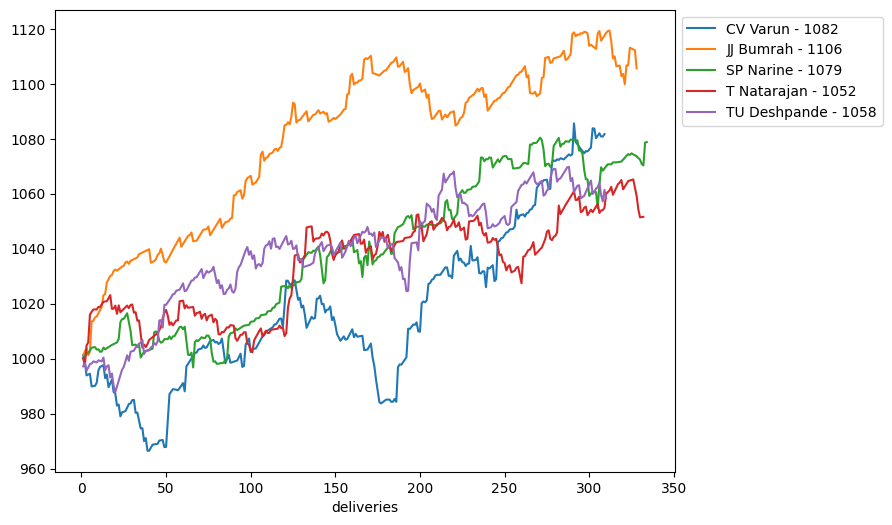

In [14]:
#Plot the top 5 bowlers who have bowled over 250 deliveries,
top_batters = elo.plot_top_players(bowler_elo, bowler_elo_tracker, role = "bowler", n = 5, thresh = 200)

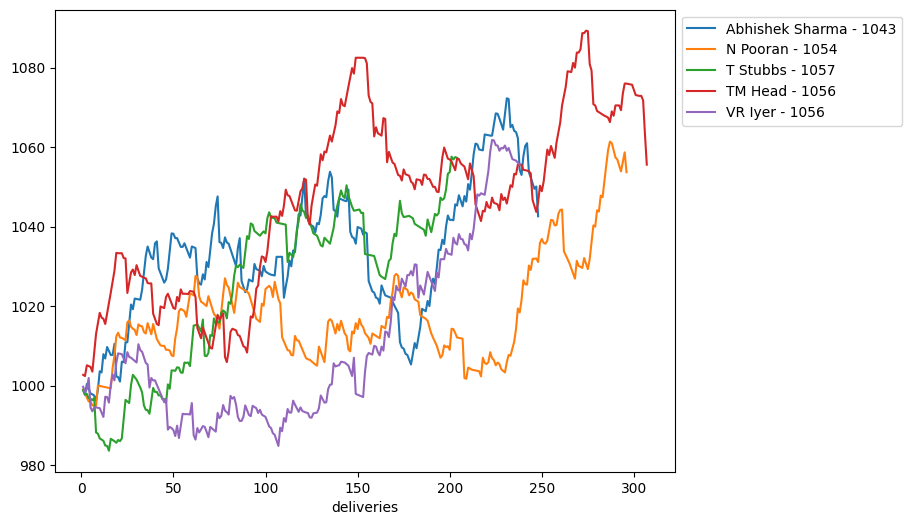

In [15]:
#Plot the top 5 batter who have faced over 250 deliveries,
top_batters = elo.plot_top_players(batter_elo, batter_elo_tracker, role = "batter", n = 5, thresh = 200)